In [ ]:
import numpy as np
import mpl_scatter_density
from mpl_scatter_density import scatter_density_artist
import matplotlib.pyplot as plt
import pandas as pd
import lightkurve as lk

: 

In [1]:
#Gaia MS
df_MS = pd.read_csv(r'personal_epochs\kiana\gaia_catalog_99999.csv')
df_MS = df_MS.dropna()
df_MS

parallax = np.array(df_MS['Plx'])
distances_MS = 1000/parallax
BPmag=np.array(df_MS['BPmag'])
RPmag=np.array(df_MS['RPmag'])

bprp = BPmag-RPmag

stellarColors_MS = bprp
stellarMags_MS = df_MS['Gmag']

x = np.array(stellarColors_MS)
y = np.array(stellarMags_MS-5*np.log10(distances_MS)+5)

print(len(x),len(y))

is_nan = np.isnan(y)
not_nan = np.invert(is_nan)

x = x[not_nan]
y = y[not_nan]

NameError: name 'pd' is not defined

C:\Users\Kiana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\Kiana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


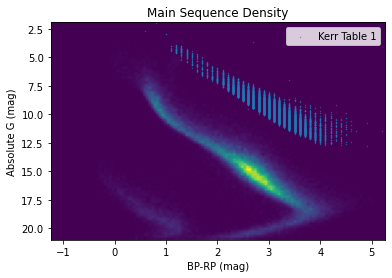

In [8]:
#Kerr
df = pd.read_csv(r'data\current\full_key.csv')
df=df.dropna()
df

rightAscension = df['GDR2_RA']
declination = df['GDR2_DEC']
distances = np.array(df['Distance'])

stellarColors = df['bp-rp']
stellarMags = df['absolute_mag']
b=stellarMags#-(5*np.log10(distances)+5)
a=stellarColors

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='scatter_density')
ax.scatter_density(x, y, dpi=30, cmap='viridis',zorder=1,label='Density MS')
axkerr = plt.scatter(a,b,cmap='viridis',zorder=2,label='Kerr Table 1',s=0.1)

plt.xlabel("BP-RP (mag)") 
plt.ylabel("Absolute G (mag)")
plt.title("Main Sequence Density")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

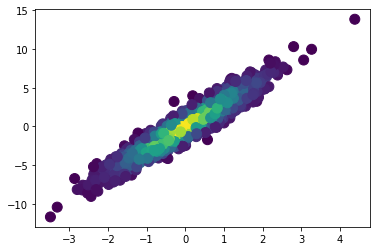

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()